In [1]:
import pandas as pd

file_path = "C:/Users/balla/Downloads/archive/data.csv"
data = pd.read_csv(file_path)
print(data.head())

           ssn            cc_num      first      last gender  \
0  024-79-2449    30417925130692    Felicia     Gomez      F   
1  269-54-1394  4224979584238239    Jeffrey   Mathews      M   
2  527-16-1817  4056555304074394  Christina     Ellis      F   
3  314-98-4472  6011544296258081     Steven    Murphy      M   
4  390-83-9961   374917808855764    Cynthia  Martinez      F   

                          street              city state    zip      lat  ...  \
0           486 Benson Stravenue          Rockford    IL  61107  42.2786  ...   
1     5430 Leslie Flat Suite 854             Ceres    CA  95307  37.5833  ...   
2      75933 Harvey Via Apt. 423           Buffalo    NY  14224  42.8371  ...   
3   268 Anderson Valley Apt. 958  Mansfield Center    CT   6250  41.7698  ...   
4  53164 Deborah Square Apt. 739           Anaheim    CA  92804  33.8186  ...   

   customer_avg_amout_1_day  customer_avg_amount_7_day  \
0                      4.01                      18.27   
1           

In [2]:
print(data.shape)
print(f"\nColumns: {data.columns}")
print(f"\nDescription: {data.describe()}")
print(f"\nInfo: {data.info()}")

(8580255, 44)

Columns: Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day', 'trans_time_secs', 'trans_time_hrs',
       'trans_time_is_night', 'trans_time_day', 'trans_date_is_weekend',
       'customer_avg_amout_1_day', 'customer_avg_amount_7_day',
       'customer_avg_amount_30_day', 'merchant_num_trans_1_day',
       'merchant_num_trans_7_day', 'merchant_num_trans_30_day',
       'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day',
       'merchant_risk_90_day'],
      dtype='object')

Description:              cc_num           zip           lat          long      city_pop  \
count  8.580255e+06  8.580255e+06  8.580255e+06  8.58025

In [3]:
# List of columns to drop
drop_cols = ['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 
             'job', 'dob', 'acct_num', 'profile', 'trans_time_secs', 'trans_time_hrs']

# Dropping columns
df_cleaned = data.drop(columns=drop_cols)

df_cleaned.shape


(8580255, 26)

In [4]:
df_cleaned = df_cleaned.rename(columns={'customer_avg_amout_1_day': 'customer_avg_amount_1_day'})

In [5]:
# Checking for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])

# Checking for duplicate transactions
duplicates = df_cleaned.duplicated().sum()
print(duplicates)


Series([], dtype: int64)
0


In [20]:
# Count Fraud vs. Non-Fraud Transactions

C:\Users\balla\AppData\Local\Temp\ipykernel_17292\2566343700.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['green', 'red'])


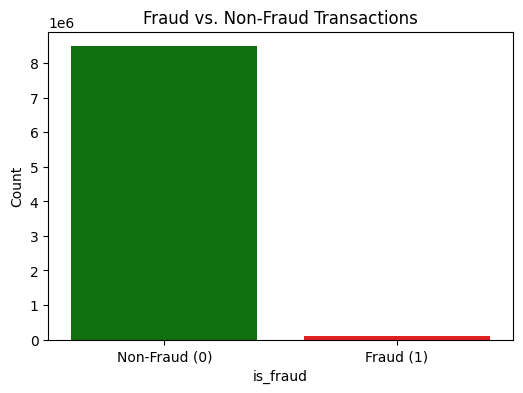

Non-Fraud Transactions: 8485449
Fraud Transactions: 94806
Fraud Percentage: 1.1049%


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of fraud and non-fraud transactions
fraud_counts = df_cleaned["is_fraud"].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['green', 'red'])
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.title("Fraud vs. Non-Fraud Transactions")
plt.show()


print(f"Non-Fraud Transactions: {fraud_counts[0]}")
print(f"Fraud Transactions: {fraud_counts[1]}")
print(f"Fraud Percentage: {fraud_counts[1] / fraud_counts.sum() * 100:.4f}%")

In [22]:
# Transaction Amount Distribution

C:\Users\balla\AppData\Local\Temp\ipykernel_17292\4282306861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['is_fraud'], y=df_cleaned['amt'], showfliers=False, palette=['green', 'red'])


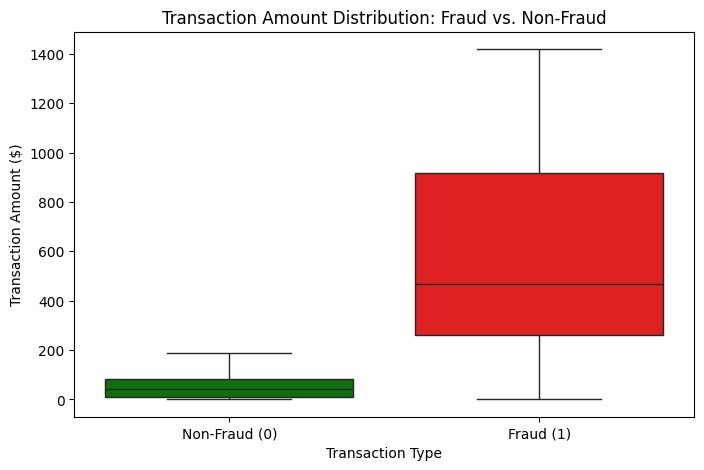

Median Transaction Amount (Non-Fraud): 44.24
Median Transaction Amount (Fraud): 468.45


In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['is_fraud'], y=df_cleaned['amt'], showfliers=False, palette=['green', 'red'])
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Transaction Amount ($)")
plt.xlabel("Transaction Type")
plt.title("Transaction Amount Distribution: Fraud vs. Non-Fraud")
plt.show()


print(f"Median Transaction Amount (Non-Fraud): {df_cleaned[df_cleaned['is_fraud'] == 0]['amt'].median():.2f}")
print(f"Median Transaction Amount (Fraud): {df_cleaned[df_cleaned['is_fraud'] == 1]['amt'].median():.2f}")


In [24]:
# Time-Based Fraud Analysis

In [25]:
# Fraud by Transaction Date

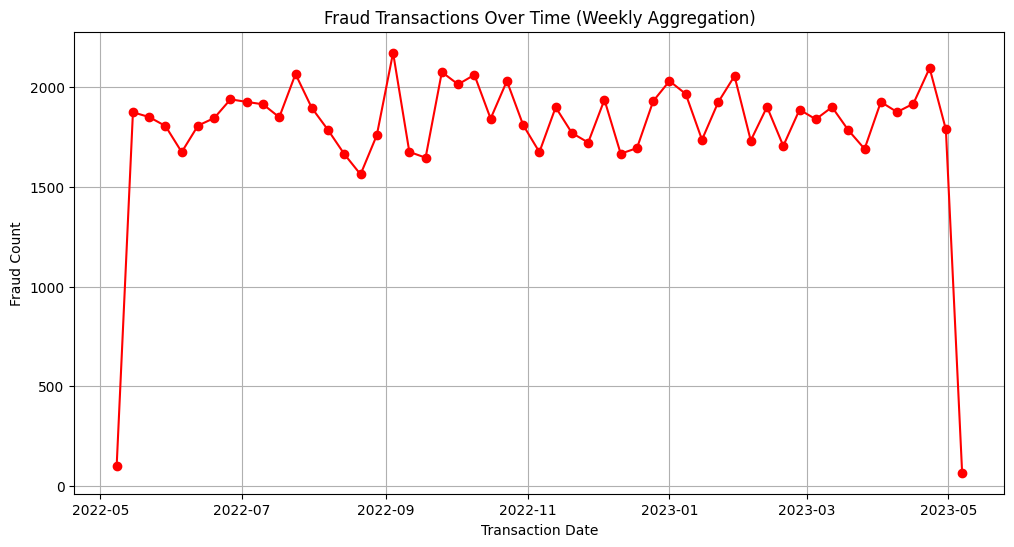

In [26]:
# Converting transaction date to datetime format
df_cleaned['trans_date'] = pd.to_datetime(df_cleaned['trans_date'])

# Aggregating fraud count by week
fraud_trend = df_cleaned[df_cleaned['is_fraud'] == 1].groupby(pd.Grouper(key='trans_date', freq='W')).size()

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(fraud_trend.index, fraud_trend.values, color='red', linestyle='-', marker='o')
plt.xlabel("Transaction Date")
plt.ylabel("Fraud Count")
plt.title("Fraud Transactions Over Time (Weekly Aggregation)")
plt.grid()
plt.show()


In [27]:
# Fraud by Hour of Day

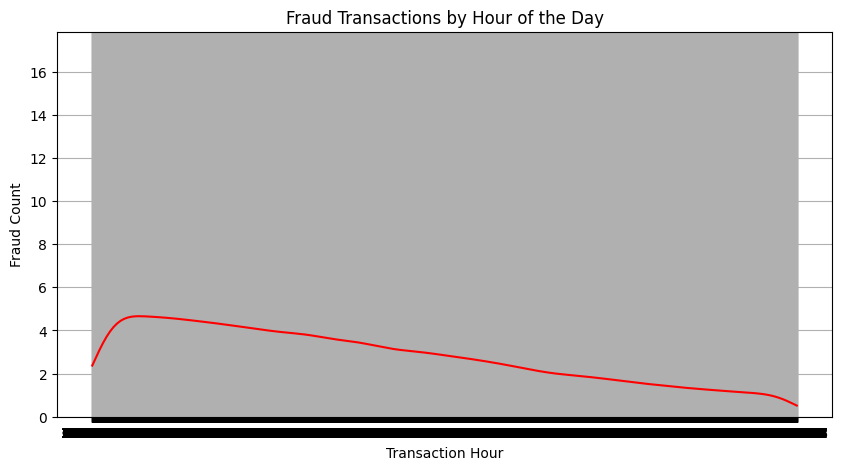

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned[df_cleaned['is_fraud'] == 1]['trans_time'], bins=24, kde=True, color='red')
plt.title('Fraud Transactions by Hour of the Day')
plt.xlabel('Transaction Hour')
plt.ylabel('Fraud Count')
plt.grid()
plt.show()

In [29]:
# Fraud on Weekends vs. Weekdays

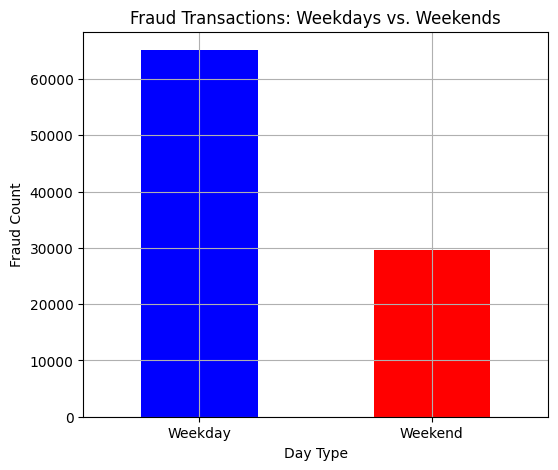

In [30]:
fraud_weekend = df_cleaned[df_cleaned['is_fraud'] == 1].groupby('trans_date_is_weekend').size()
fraud_weekend.index = ['Weekday', 'Weekend']

plt.figure(figsize=(6,5))
fraud_weekend.plot(kind='bar', color=['blue', 'red'])
plt.title('Fraud Transactions: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Fraud Count')
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [31]:
# Category-Based Fraud Analysis

In [32]:
# Count Fraudulent Transactions per Category

C:\Users\balla\AppData\Local\Temp\ipykernel_17292\393634535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Reds')


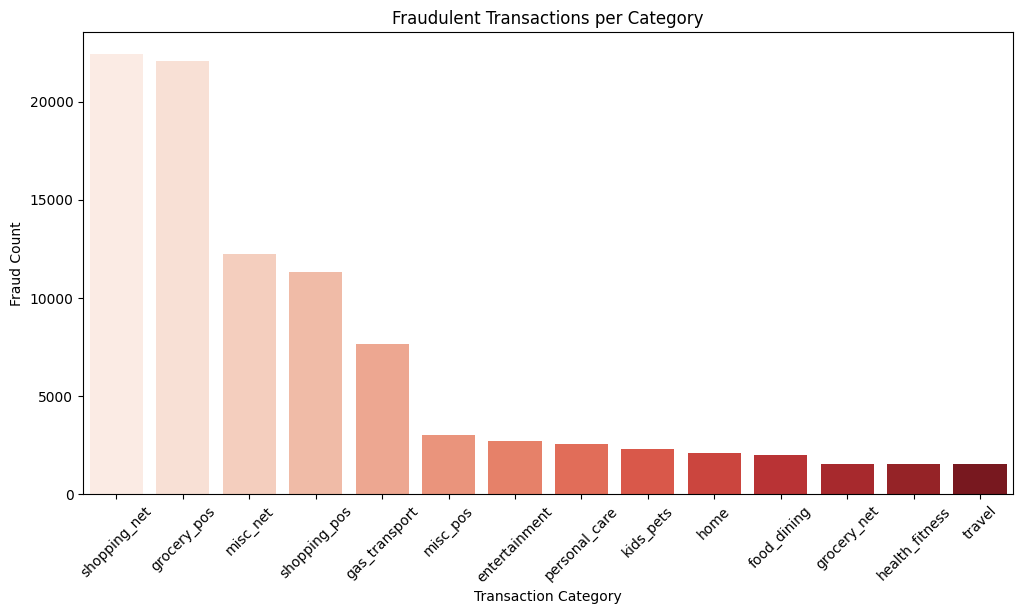

In [33]:
plt.figure(figsize=(12,6))
fraud_counts = df_cleaned[df_cleaned['is_fraud'] == 1]['category'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Reds')
plt.xticks(rotation=45)
plt.xlabel("Transaction Category")
plt.ylabel("Fraud Count")
plt.title("Fraudulent Transactions per Category")
plt.show()

In [34]:
# Fraud Rate per Category

C:\Users\balla\AppData\Local\Temp\ipykernel_17292\3715865470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='Reds')


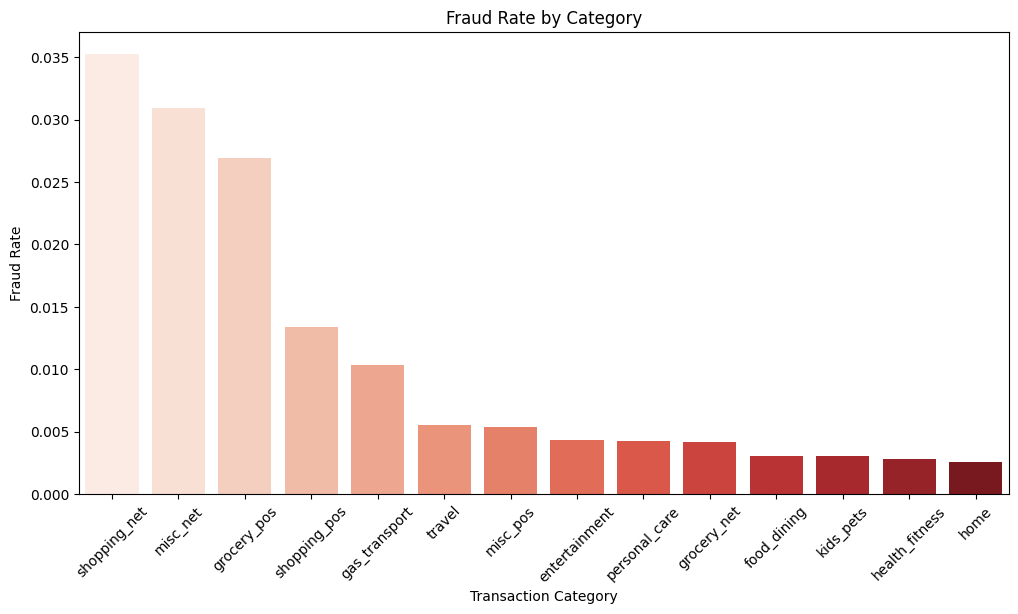

In [35]:
plt.figure(figsize=(12,6))
fraud_rate = df_cleaned[df_cleaned['is_fraud'] == 1]['category'].value_counts() / df_cleaned['category'].value_counts()
fraud_rate = fraud_rate.sort_values(ascending=False)

sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='Reds')
plt.xticks(rotation=45)
plt.xlabel("Transaction Category")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Category")
plt.show()

In [36]:
# Fraud Amount Distribution per Category

C:\Users\balla\AppData\Local\Temp\ipykernel_17292\2901064034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_amounts.index, y=fraud_amounts.values, palette='Reds')


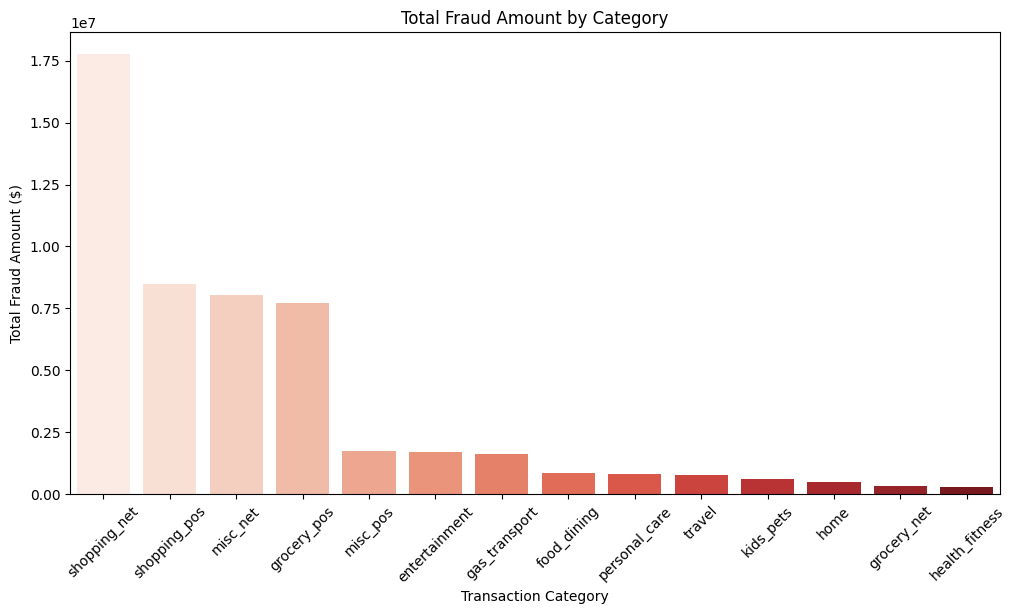

In [37]:
plt.figure(figsize=(12,6))
fraud_amounts = df_cleaned[df_cleaned['is_fraud'] == 1].groupby('category')['amt'].sum().sort_values(ascending=False)

sns.barplot(x=fraud_amounts.index, y=fraud_amounts.values, palette='Reds')
plt.xticks(rotation=45)
plt.xlabel("Transaction Category")
plt.ylabel("Total Fraud Amount ($)")
plt.title("Total Fraud Amount by Category")
plt.show()


In [38]:
# Fraud Amount Distribution (Boxplot)

C:\Users\balla\AppData\Local\Temp\ipykernel_17292\2325274094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='amt', data=df_cleaned[df_cleaned['is_fraud'] == 1], palette='Reds')


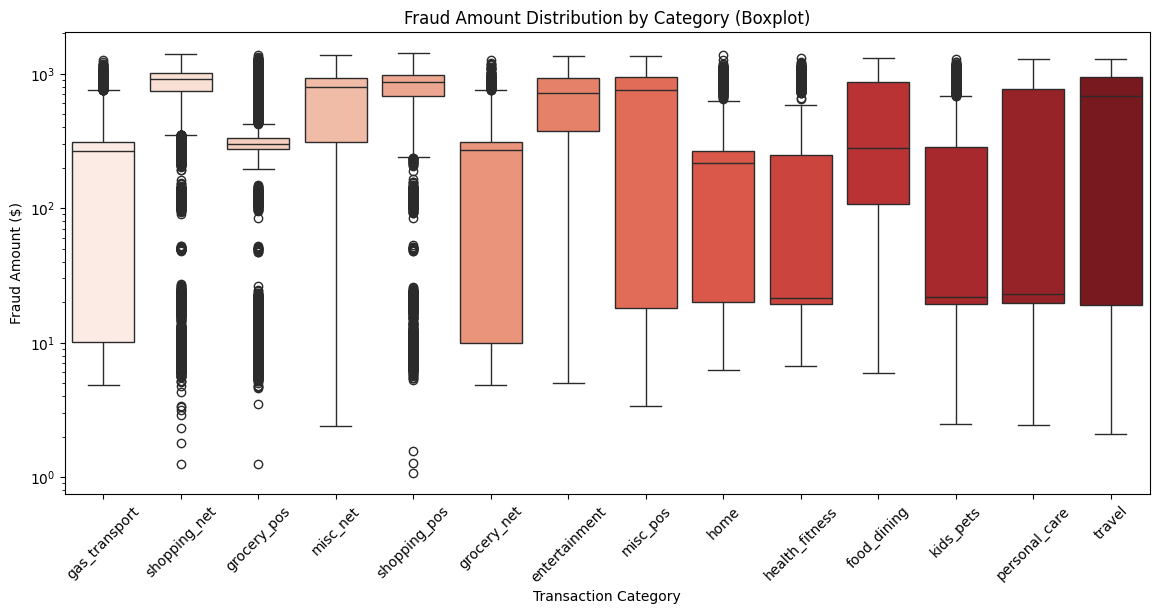

In [39]:
plt.figure(figsize=(14,6))
sns.boxplot(x='category', y='amt', data=df_cleaned[df_cleaned['is_fraud'] == 1], palette='Reds')
plt.xticks(rotation=45)
plt.xlabel("Transaction Category")
plt.ylabel("Fraud Amount ($)")
plt.yscale('log')  # Log scale to handle extreme outliers
plt.title("Fraud Amount Distribution by Category (Boxplot)")
plt.show()


In [40]:
# Merchant Risk Analysis

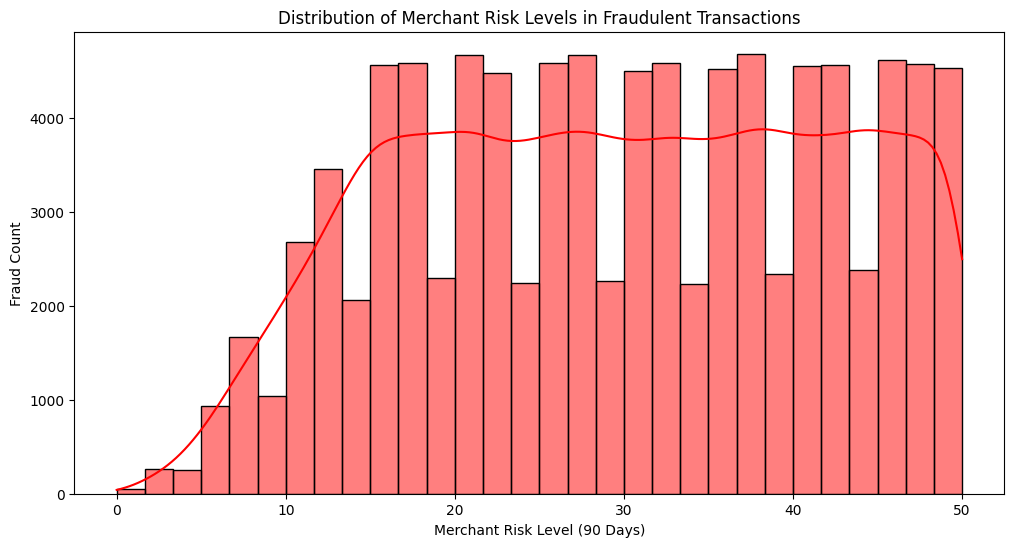

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df_cleaned[df_cleaned['is_fraud'] == 1]['merchant_risk_90_day'], bins=30, kde=True, color='red')
plt.xlabel("Merchant Risk Level (90 Days)")
plt.ylabel("Fraud Count")
plt.title("Distribution of Merchant Risk Levels in Fraudulent Transactions")
plt.show()


In [42]:
# Merchant Fraud Rate Analysis

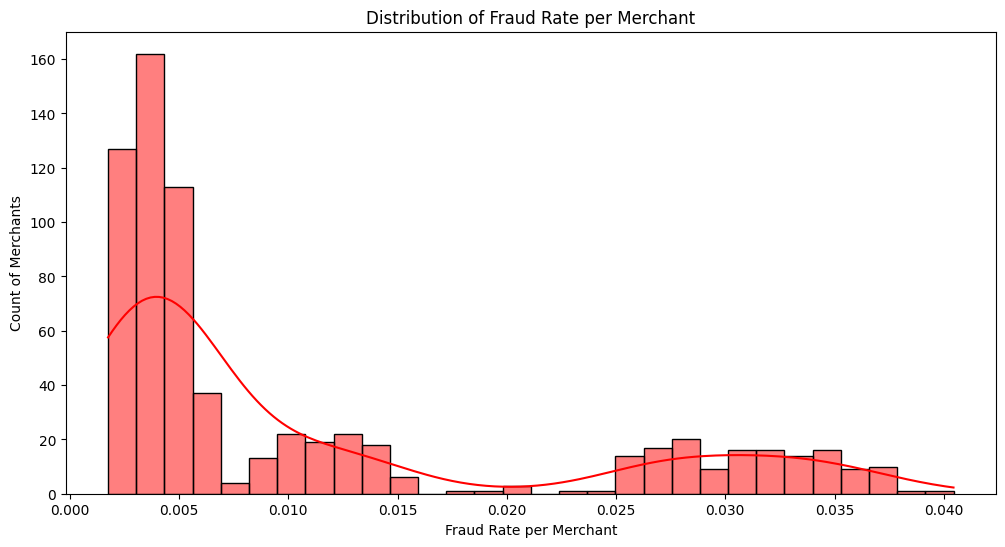

In [43]:
# Calculating fraud rate per merchant
merchant_fraud = df_cleaned.groupby('merchant')['is_fraud'].mean().reset_index()

# Plot 
plt.figure(figsize=(12,6))
sns.histplot(merchant_fraud['is_fraud'], bins=30, kde=True, color='red')
plt.xlabel("Fraud Rate per Merchant")
plt.ylabel("Count of Merchants")
plt.title("Distribution of Fraud Rate per Merchant")
plt.show()


In [44]:
# Identifying High-Risk Merchants

In [45]:
# high-risk merchants (fraud rate > 3%)
high_risk_merchants = merchant_fraud[merchant_fraud['is_fraud'] > 0.03]


import pandas as pd
import IPython.display as display

display.display(high_risk_merchants.sort_values(by='is_fraud', ascending=False).head(10))


merchant  is_fraud
189                    fraud_Gerlach Inc  0.040446
200                    fraud_Goyette Inc  0.038519
502      fraud_Reichert, Huels and Hoppe  0.037608
8                    fraud_Ankunding LLC  0.037423
311    fraud_Kihn, Abernathy and Douglas  0.037244
687      fraud_Zboncak, Rowe and Murazik  0.036953
337                    fraud_Kozey-Boehm  0.036910
443  fraud_Mosciski, Ziemann and Farrell  0.036903
504   fraud_Reichert, Shanahan and Hayes  0.036899
27                 fraud_Bashirian Group  0.036722

In [46]:
# Deeper Merchant Analysis

In [47]:
# Group by merchant and sum fraud transactions
merchant_fraud_analysis = df_cleaned[df_cleaned['is_fraud'] == 1].groupby('merchant').agg(
    total_fraud_amount=('amt', 'sum'),
    fraud_count=('is_fraud', 'count')
).sort_values(by='fraud_count', ascending=False)


import IPython.display as display
display.display(merchant_fraud_analysis.head(10))


total_fraud_amount  fraud_count
merchant                                              
fraud_Gerlach Inc               407929.01          515
fraud_Kilback LLC               181934.81          511
fraud_Boyer PLC                 389558.95          504
fraud_Goyette Inc               390781.84          494
fraud_Miller-Hauck              158446.76          486
fraud_Kuhn LLC                  343838.64          482
fraud_Schumm PLC                362913.12          480
fraud_Ankunding LLC             374384.59          478
fraud_Cormier LLC               359041.28          475
fraud_Deckow-O'Conner           172327.93          475

In [48]:
# Deeper Merchant Fraud Profiling

In [49]:
# Analyzing fraud distribution across merchants
merchant_fraud_stats = df_cleaned[df_cleaned['is_fraud'] == 1].groupby('merchant').agg(
    avg_fraud_amt=('amt', 'mean'),
    median_fraud_amt=('amt', 'median'),
    max_fraud_amt=('amt', 'max'),
    min_fraud_amt=('amt', 'min'),
    fraud_count=('is_fraud', 'count')
).sort_values(by='fraud_count', ascending=False)


import IPython.display as display
display.display(merchant_fraud_stats.head(10))


avg_fraud_amt  median_fraud_amt  max_fraud_amt  \
merchant                                                                
fraud_Gerlach Inc         792.095165           921.970        1263.32   
fraud_Kilback LLC         356.036810           297.530        1273.86   
fraud_Boyer PLC           772.934425           894.555        1320.76   
fraud_Goyette Inc         791.056356           907.175        1226.98   
fraud_Miller-Hauck        326.022140           297.380        1303.03   
fraud_Kuhn LLC            713.358174           827.340        1263.99   
fraud_Schumm PLC          756.069000           898.360        1291.52   
fraud_Ankunding LLC       783.231360           898.025        1319.73   
fraud_Cormier LLC         755.876379           896.340        1264.08   
fraud_Deckow-O'Conner     362.795642           300.580        1215.36   

                       min_fraud_amt  fraud_count  
merchant                                           
fraud_Gerlach Inc               6.06          515  
fraud_Kilback LLC               5.47          511  
fraud_Boyer PLC                 6.64          504  
fraud_Goyette Inc               5.52          494  
fraud_Miller-Hauck              5.92          486  
fraud_Kuhn LLC                  5.23          482  
fraud_Schumm PLC                6.43          480  
fraud_Ankunding LLC             5.61          478  
fraud_Cormier LLC               6.78          475  
fraud_Deckow-O'Conner           4.63          475

C:\Users\balla\AppData\Local\Temp\ipykernel_31240\3491590079.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=top_merchants, x='trans_date', y='amt', hue='merchant', estimator='sum', ci=None)


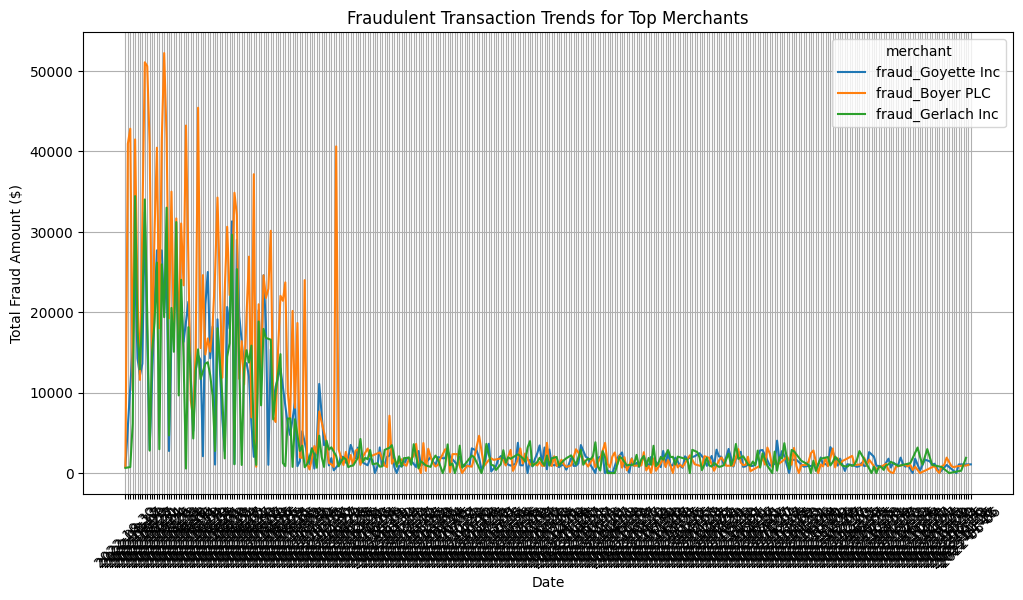

In [12]:
# Analyzing fraud over time for top merchants
import matplotlib.pyplot as plt
import seaborn as sns

top_merchants = df_cleaned[df_cleaned['merchant'].isin(['fraud_Gerlach Inc', 'fraud_Boyer PLC', 'fraud_Goyette Inc'])]

plt.figure(figsize=(12,6))
sns.lineplot(data=top_merchants, x='trans_date', y='amt', hue='merchant', estimator='sum', ci=None)
plt.title("Fraudulent Transaction Trends for Top Merchants")
plt.xlabel("Date")
plt.ylabel("Total Fraud Amount ($)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

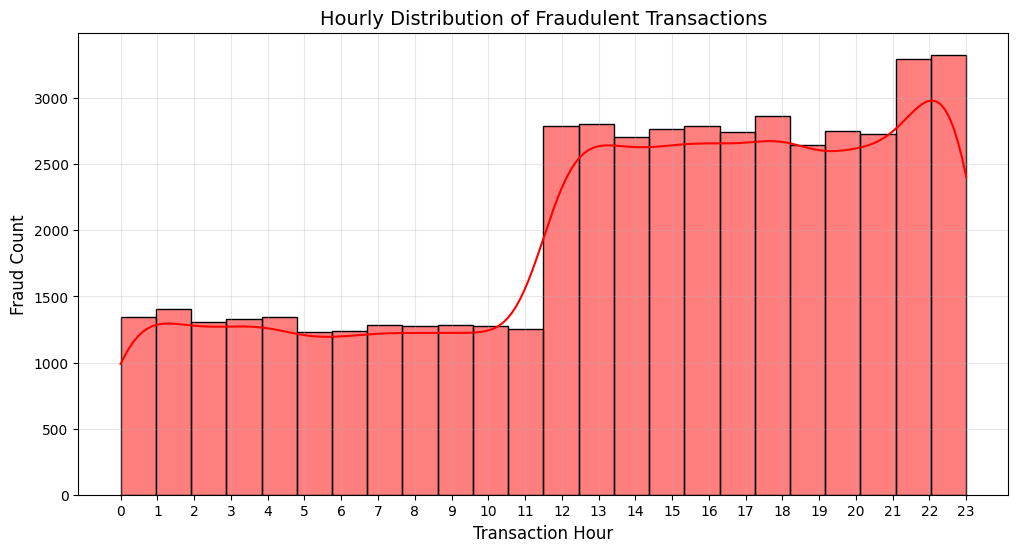

In [51]:
plt.figure(figsize=(12,6))

# Converting trans_time to hour values 
df_cleaned['transaction_hour'] = pd.to_datetime(df_cleaned['trans_time'], format='%H:%M:%S').dt.hour

# Plot 
sns.histplot(
    df_cleaned[df_cleaned['merchant'].isin(['fraud_Goyette Inc', 'fraud_Boyer PLC', 'fraud_Gerlach Inc'])]['transaction_hour'], 
    bins=24, kde=True, color="red", edgecolor='black'
)
plt.title("Hourly Distribution of Fraudulent Transactions", fontsize=14)
plt.xlabel("Transaction Hour", fontsize=12)
plt.ylabel("Fraud Count", fontsize=12)
plt.xticks(range(0, 24))  
plt.grid(alpha=0.3)
plt.gca().set_facecolor('white')  
plt.show()

In [52]:
# Geospatial Fraud Analysis (Fraud by Location)

In [53]:
# Scatter Plot of Fraud Transactions

In [6]:
import folium
from folium.plugins import MarkerCluster

# Creating a base map centered in the US
fraud_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Filtering only fraudulent transactions and sampling 5000 points for better visualization
fraud_locations = df_cleaned[df_cleaned['is_fraud'] == 1][['merch_lat', 'merch_long']].sample(n=5000, random_state=42)

# Creating a marker cluster
marker_cluster = MarkerCluster().add_to(fraud_map)

# Adding points to the cluster
for _, row in fraud_locations.iterrows():
    folium.Marker(location=[row['merch_lat'], row['merch_long']], icon=folium.Icon(color='red')).add_to(marker_cluster)

fraud_map


In [7]:
# Customer Behavior & Risk Analysis

In [8]:
# Identifying High-Risk Customers

In [9]:
# Identifying High-Risk Customers
customer_fraud_analysis = df_cleaned[df_cleaned['is_fraud'] == 1].groupby(
    ['customer_num_trans_1_day', 'customer_num_trans_7_day', 'customer_num_trans_30_day']
).agg(
    total_fraud_transactions=('is_fraud', 'count'),
    total_fraud_amount=('amt', 'sum'),
    avg_fraud_amount=('amt', 'mean'),
    customer_avg_amount_1_day=('customer_avg_amount_1_day', 'mean'),
    customer_avg_amount_7_day=('customer_avg_amount_7_day', 'mean'),
    customer_avg_amount_30_day=('customer_avg_amount_30_day', 'mean')
).sort_values(by='total_fraud_transactions', ascending=False)


customer_fraud_analysis = customer_fraud_analysis.reset_index()

# top customer transaction patterns linked to fraud
import IPython.display as display
display.display(customer_fraud_analysis.head(10))


customer_num_trans_1_day  customer_num_trans_7_day  \
0                         4                         8   
1                         2                         6   
2                         2                         5   
3                         5                         7   
4                         5                         6   
5                         0                         1   
6                         4                         9   
7                         1                         6   
8                         6                         8   
9                         0                         1   

   customer_num_trans_30_day  total_fraud_transactions  total_fraud_amount  \
0                         17                       432           255388.32   
1                         11                       431           248182.40   
2                         12                       429           237861.63   
3                         17                       428           231763.82   
4                         12                       422           226564.87   
5                         11                       421           218836.09   
6                         16                       420           232842.26   
7                         12                       417           225377.61   
8                         14                       417           229423.24   
9                          8                       416           219685.36   

   avg_fraud_amount  customer_avg_amount_1_day  customer_avg_amount_7_day  \
0        591.176667                  45.515602                  45.710810   
1        575.829234                  45.138677                  44.062483   
2        554.456014                  44.762145                  45.841329   
3        541.504252                  46.745093                  47.793575   
4        536.883578                  44.442583                  43.722488   
5        519.800689                  46.376413                  46.042162   
6        554.386333                  45.154095                  45.223238   
7        540.473885                  43.867770                  44.903237   
8        550.175635                  45.019712                  45.733357   
9        528.089808                  45.256274                  47.972188   

   customer_avg_amount_30_day  
0                   38.075509  
1                   36.169791  
2                   35.924452  
3                   37.651846  
4                   35.384147  
5                   37.011425  
6                   35.605333  
7                   33.314724  
8                   35.608489  
9                   35.851490

In [10]:
# Visualizing Fraud Amounts per Customer

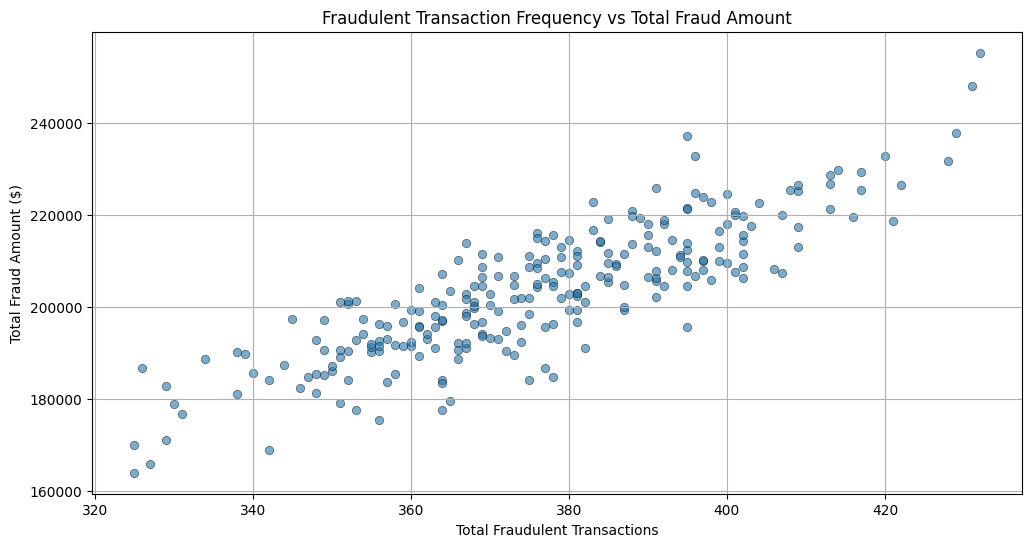

In [13]:
# Scatter plot of fraudulent transaction frequency vs. fraud amount
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=customer_fraud_analysis,
    x='total_fraud_transactions',
    y='total_fraud_amount',
    alpha=0.6,
    edgecolor='black'
)
plt.title("Fraudulent Transaction Frequency vs Total Fraud Amount")
plt.xlabel("Total Fraudulent Transactions")
plt.ylabel("Total Fraud Amount ($)")
plt.grid()
plt.show()

In [14]:
# Customer Risk Score

In [15]:
customer_fraud_analysis['customer_risk_score'] = (
    customer_fraud_analysis['total_fraud_amount'] * customer_fraud_analysis['total_fraud_transactions']
)

# top high-risk customers
display.display(customer_fraud_analysis.sort_values(by='customer_risk_score', ascending=False).head(10))


customer_num_trans_1_day  customer_num_trans_7_day  \
0                          4                         8   
1                          2                         6   
2                          2                         5   
3                          5                         7   
6                          4                         9   
8                          6                         8   
4                          5                         6   
10                         2                         3   
12                         2                         5   
7                          1                         6   

    customer_num_trans_30_day  total_fraud_transactions  total_fraud_amount  \
0                          17                       432           255388.32   
1                          11                       431           248182.40   
2                          12                       429           237861.63   
3                          17                       428           231763.82   
6                          16                       420           232842.26   
8                          14                       417           229423.24   
4                          12                       422           226564.87   
10                         12                       414           229941.35   
12                         15                       413           228838.13   
7                          12                       417           225377.61   

    avg_fraud_amount  customer_avg_amount_1_day  customer_avg_amount_7_day  \
0         591.176667                  45.515602                  45.710810   
1         575.829234                  45.138677                  44.062483   
2         554.456014                  44.762145                  45.841329   
3         541.504252                  46.745093                  47.793575   
6         554.386333                  45.154095                  45.223238   
8         550.175635                  45.019712                  45.733357   
4         536.883578                  44.442583                  43.722488   
10        555.413889                  45.737512                  45.876522   
12        554.087482                  44.271380                  46.372809   
7         540.473885                  43.867770                  44.903237   

    customer_avg_amount_30_day  customer_risk_score  
0                    38.075509         1.103278e+08  
1                    36.169791         1.069666e+08  
2                    35.924452         1.020426e+08  
3                    37.651846         9.919491e+07  
6                    35.605333         9.779375e+07  
8                    35.608489         9.566949e+07  
4                    35.384147         9.561038e+07  
10                   36.198430         9.519572e+07  
12                   35.528571         9.451015e+07  
7                    33.314724         9.398246e+07

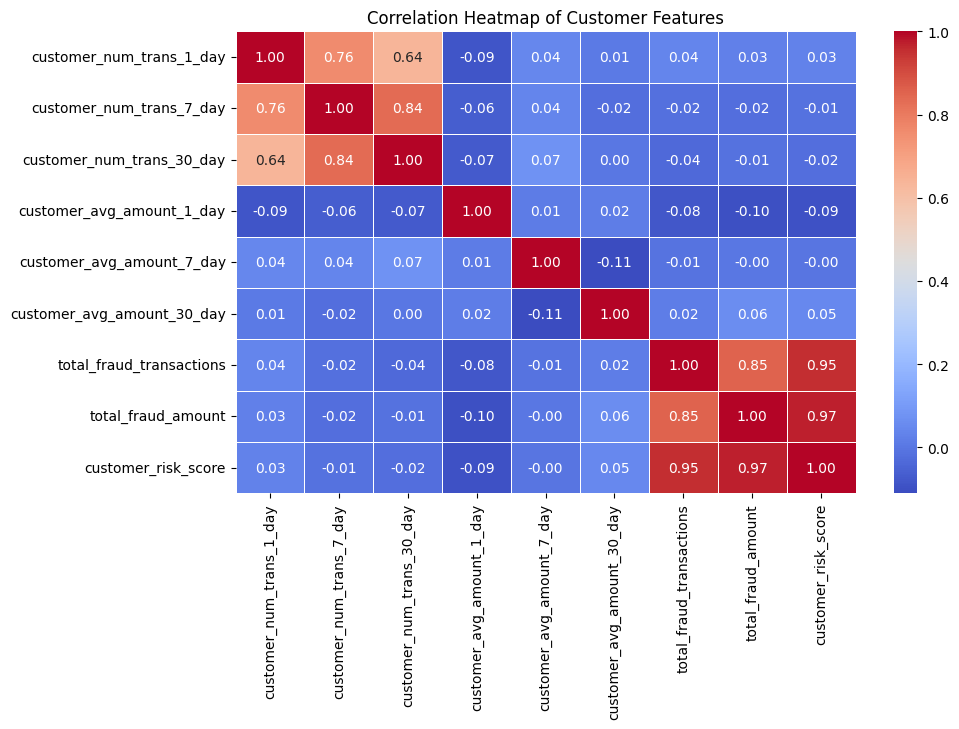

In [16]:
customer_features = [
    'customer_num_trans_1_day', 'customer_num_trans_7_day', 'customer_num_trans_30_day',
    'customer_avg_amount_1_day', 'customer_avg_amount_7_day', 'customer_avg_amount_30_day',
    'total_fraud_transactions', 'total_fraud_amount', 'customer_risk_score'
]

# correlation matrix
corr_matrix = customer_fraud_analysis[customer_features].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Customer Features")
plt.show()

In [63]:
# Defining risk categories based on customer risk score
def categorize_risk(score):
    if score > customer_fraud_analysis['customer_risk_score'].quantile(0.75):
        return "High Risk"
    elif score > customer_fraud_analysis['customer_risk_score'].quantile(0.50):
        return "Medium Risk"
    else:
        return "Low Risk"

# risk categorization
customer_fraud_analysis['risk_category'] = customer_fraud_analysis['customer_risk_score'].apply(categorize_risk)

display.display(customer_fraud_analysis[['customer_risk_score', 'risk_category']].head(10))


customer_risk_score risk_category
0         1.103278e+08     High Risk
1         1.069666e+08     High Risk
2         1.020426e+08     High Risk
3         9.919491e+07     High Risk
4         9.561038e+07     High Risk
5         9.212999e+07     High Risk
6         9.779375e+07     High Risk
7         9.566949e+07     High Risk
8         9.398246e+07     High Risk
9         9.138911e+07     High Risk

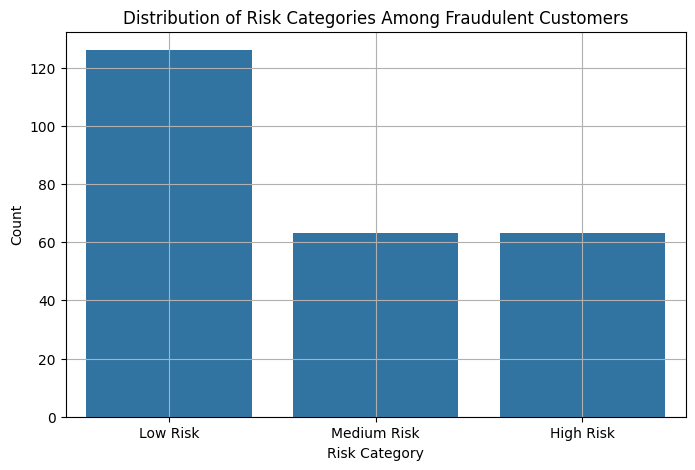

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(data=customer_fraud_analysis, x='risk_category', order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title("Distribution of Risk Categories Among Fraudulent Customers")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.grid()
plt.show()


In [65]:
df_cleaned.columns

Index(['trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day', 'trans_time_is_night', 'trans_time_day',
       'trans_date_is_weekend', 'customer_avg_amount_1_day',
       'customer_avg_amount_7_day', 'customer_avg_amount_30_day',
       'merchant_num_trans_1_day', 'merchant_num_trans_7_day',
       'merchant_num_trans_30_day', 'merchant_risk_1_day',
       'merchant_risk_7_day', 'merchant_risk_30_day', 'merchant_risk_90_day',
       'transaction_hour'],
      dtype='object')

In [17]:
df_cleaned.to_csv("df_cleaned.csv", index=False, encoding='utf-8', mode='w')
print("df_cleaned saved as CSV successfully!")


df_cleaned saved as CSV successfully!


In [18]:
chunk_size = 100000

for i, chunk in enumerate(range(0, len(df_cleaned), chunk_size)):
    df_cleaned.iloc[chunk:chunk+chunk_size].to_parquet(f"df_cleaned_part_{i}.parquet", engine="pyarrow")
    print(f"Saved chunk {i} as Parquet")


Saved chunk 0 as Parquet
Saved chunk 1 as Parquet
Saved chunk 2 as Parquet
Saved chunk 3 as Parquet
Saved chunk 4 as Parquet
Saved chunk 5 as Parquet
Saved chunk 6 as Parquet
Saved chunk 7 as Parquet
Saved chunk 8 as Parquet
Saved chunk 9 as Parquet
Saved chunk 10 as Parquet
Saved chunk 11 as Parquet
Saved chunk 12 as Parquet
Saved chunk 13 as Parquet
Saved chunk 14 as Parquet
Saved chunk 15 as Parquet
Saved chunk 16 as Parquet
Saved chunk 17 as Parquet
Saved chunk 18 as Parquet
Saved chunk 19 as Parquet
Saved chunk 20 as Parquet
Saved chunk 21 as Parquet
Saved chunk 22 as Parquet
Saved chunk 23 as Parquet
Saved chunk 24 as Parquet
Saved chunk 25 as Parquet
Saved chunk 26 as Parquet
Saved chunk 27 as Parquet
Saved chunk 28 as Parquet
Saved chunk 29 as Parquet
Saved chunk 30 as Parquet
Saved chunk 31 as Parquet
Saved chunk 32 as Parquet
Saved chunk 33 as Parquet
Saved chunk 34 as Parquet
Saved chunk 35 as Parquet
Saved chunk 36 as Parquet
Saved chunk 37 as Parquet
Saved chunk 38 as Parq

In [20]:
from google.cloud import storage

# Initializing Storage Client
storage_client = storage.Client()

# bucket name 
bucket_name = "fraud-detection-bucket-451205"  

# Creating the bucket
bucket = storage_client.create_bucket(bucket_name)
print(f"Bucket '{bucket_name}' created successfully!")


Conflict: 409 POST https://storage.googleapis.com/storage/v1/b?project=fraud-detection-api-451511&prettyPrint=false: The requested bucket name is not available. The bucket namespace is shared by all users of the system. Please select a different name and try again.

In [21]:
import glob

# Storage Client
storage_client = storage.Client()

# bucket name
bucket_name = "fraud-detection-bucket-451205"
bucket = storage_client.bucket(bucket_name)

# Getting all the Parquet files
parquet_files = glob.glob("df_cleaned_part_*.parquet")

# Uploading each file
for file_path in parquet_files:
    blob = bucket.blob(file_path)  
    blob.upload_from_filename(file_path)  
    print(f"Uploaded {file_path} to GCS bucket: {bucket_name}")

print("All files uploaded to Google Cloud Storage successfully!")


Uploaded df_cleaned_part_0.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_1.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_10.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_11.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_12.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_13.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_14.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_15.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_16.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_17.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_18.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_19.parquet to GCS bucket: fraud-detection-bucket-451205
Uploaded df_cleaned_part_2.par

In [22]:
from google.cloud import bigquery

# Initialize BigQuery Client
bq_client = bigquery.Client()


project_id = "carbide-eye-451205-n5"  
dataset_id = "fraud_detection_project" 
table_id = "transactions"  

table_ref = f"{project_id}.{dataset_id}.{table_id}"

# Configuring Load Job
job_config = bigquery.LoadJobConfig(
    source_format=bigquery.SourceFormat.PARQUET,
    autodetect=True, 
)

# Defining GCS file path 
gcs_uri = f"gs://fraud-detection-bucket-451205/df_cleaned_part_*.parquet"

# Loading data from GCS to BigQuery
load_job = bq_client.load_table_from_uri(gcs_uri, table_ref, job_config=job_config)
load_job.result()  
print("Data successfully loaded into BigQuery!")


BadRequest: 400 Provided Schema does not match Table carbide-eye-451205-n5:fraud_detection_project.transactions. Field trans_date has changed type from INTEGER to STRING; reason: invalid, message: Provided Schema does not match Table carbide-eye-451205-n5:fraud_detection_project.transactions. Field trans_date has changed type from INTEGER to STRING

In [23]:
from google.cloud import bigquery
from google.cloud import bigquery_storage

bq_client = bigquery.Client()
bqstorage_client = bigquery_storage.BigQueryReadClient()  

project_id = "carbide-eye-451205-n5"
dataset_id = "fraud_detection_project"
table_id = "transactions_enhanced"

table_ref = f"{project_id}.{dataset_id}.{table_id}"

In [24]:
query = f"SELECT * FROM `{table_ref}`"
df_enhanced = bq_client.query(query).to_dataframe(bqstorage_client=bqstorage_client)

print(df_enhanced.head())  

                          trans_num           trans_date trans_time  \
0  4030a8a1bd028e643b8520739ba159f4  1666224000000000000   21:38:20   
1  4d1ffc8036cc878ee11802eae3f851a0  1682640000000000000   21:18:51   
2  492bfc9acc5ab6f0d485cbd6d14b2f1a  1665878400000000000   21:09:53   
3  3bd029bea0cb371e5f3696bfd2c5214a  1682380800000000000   21:58:28   
4  2dd03cac49cbb5aa47ebc66532588049  1682899200000000000   21:14:50   

    unix_time      category    amt  is_fraud  \
0  1666298300  shopping_pos  29.87         0   
1  1682713131        travel   2.64         0   
2  1665950993  shopping_pos   1.99         0   
3  1682456308        travel   1.84         0   
4  1682972090        travel  18.92         0   

                                merchant  merch_lat  merch_long  ...  \
0        fraud_Schuppe, Nolan and Hoeger  41.119527  -92.819566  ...   
1                       fraud_Turner LLC  33.436111  -97.835315  ...   
2        fraud_Schuppe, Nolan and Hoeger  37.935244  -92.230714  ...

In [25]:
print(df_enhanced.info())

print(f"\n {df_enhanced.isnull().sum()}")


print(f"\n {df_enhanced.head()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580255 entries, 0 to 8580254
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   trans_num                        object 
 1   trans_date                       Int64  
 2   trans_time                       object 
 3   unix_time                        Int64  
 4   category                         object 
 5   amt                              float64
 6   is_fraud                         Int64  
 7   merchant                         object 
 8   merch_lat                        float64
 9   merch_long                       float64
 10  customer_num_trans_1_day         Int64  
 11  customer_num_trans_7_day         Int64  
 12  customer_num_trans_30_day        Int64  
 13  trans_time_is_night              Int64  
 14  trans_time_day                   Int64  
 15  trans_date_is_weekend            Int64  
 16  customer_avg_amount_1_day        float64
 17  customer

C:\Users\balla\AppData\Local\Temp\ipykernel_31240\1832770532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_enhanced, x='is_fraud', palette='coolwarm', ax=axes[0])
C:\Users\balla\AppData\Local\Temp\ipykernel_31240\1832770532.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_enhanced, x='is_fraud', y='amt', palette='coolwarm', ax=axes[1])


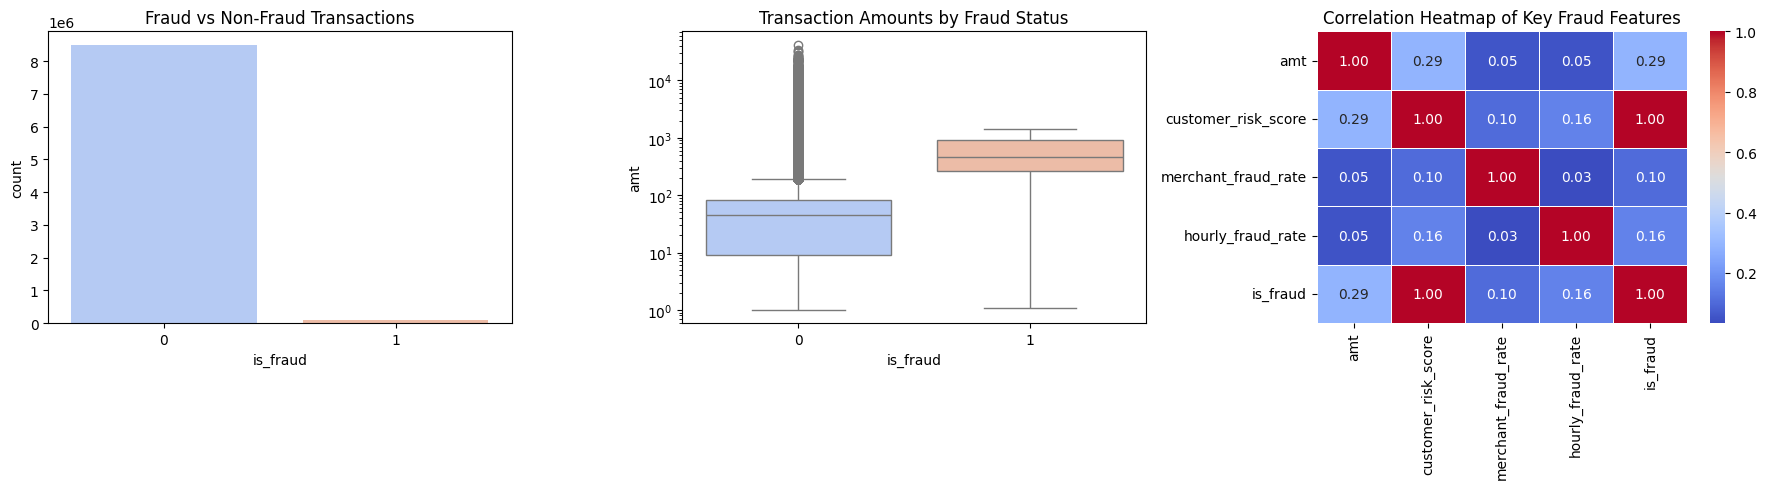

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of Fraud vs Non-Fraud Transactions
sns.countplot(data=df_enhanced, x='is_fraud', palette='coolwarm', ax=axes[0])
axes[0].set_title("Fraud vs Non-Fraud Transactions")

# Boxplot of Transaction Amounts by Fraud Status
sns.boxplot(data=df_enhanced, x='is_fraud', y='amt', palette='coolwarm', ax=axes[1])
axes[1].set_yscale("log")  # Log scale to handle skewed data
axes[1].set_title("Transaction Amounts by Fraud Status")

# Correlation Heatmap 
corr_matrix = df_enhanced[['amt', 'customer_risk_score', 'merchant_fraud_rate', 'hourly_fraud_rate', 'is_fraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[2])
axes[2].set_title("Correlation Heatmap of Key Fraud Features")

plt.tight_layout()
plt.show()


In [27]:
df_enhanced.to_csv("transactions_enhanced.csv", index=False)
print("Data saved successfully!")


Data saved successfully!


In [28]:
import pandas as pd

# Load the dataset in chunks
chunk_size = 500000
fraud_chunks = []
non_fraud_chunks = []

for chunk in pd.read_csv("transactions_enhanced.csv", chunksize=chunk_size):  
    fraud_chunk = chunk[chunk['is_fraud'] == 1]
    non_fraud_chunk = chunk[chunk['is_fraud'] == 0].sample(n=len(fraud_chunk) * 2, random_state=42)
    
    fraud_chunks.append(fraud_chunk)
    non_fraud_chunks.append(non_fraud_chunk)

# Combine processed chunks
df_fraud = pd.concat(fraud_chunks)
df_non_fraud = pd.concat(non_fraud_chunks)
df_sampled = pd.concat([df_fraud, df_non_fraud])

print(" Data loaded & balanced successfully!")


 Data loaded & balanced successfully!


In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Dropping categorical & identifier columns
X = df_sampled.drop(columns=['is_fraud', 'trans_num', 'trans_time', 'category', 'merchant'])
y = df_sampled['is_fraud']

# Applying SMOTE for balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Converting Back to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['is_fraud'] = y_resampled

# Class Distribution After Balancing
print(" Data Distribution After SMOTE:", Counter(y_resampled))


C:\Users\balla\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\balla\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\balla\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\balla\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\balla\AppData\Local\Programs\Python\Python310\lib\subp

 Data Distribution After SMOTE: Counter({1: 189612, 0: 189612})


In [30]:
print(df_balanced.columns)

Index(['trans_date', 'unix_time', 'amt', 'merch_lat', 'merch_long',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day', 'trans_time_is_night', 'trans_time_day',
       'trans_date_is_weekend', 'customer_avg_amount_1_day',
       'customer_avg_amount_7_day', 'customer_avg_amount_30_day',
       'merchant_num_trans_1_day', 'merchant_num_trans_7_day',
       'merchant_num_trans_30_day', 'merchant_risk_1_day',
       'merchant_risk_7_day', 'merchant_risk_30_day', 'merchant_risk_90_day',
       'transaction_hour', 'customer_risk_score',
       'customer_avg_transaction_amount', 'customer_fraud_ratio',
       'merchant_fraud_rate', 'merchant_high_risk_flag', 'hourly_fraud_rate',
       'is_high_risk_hour', 'is_fraud'],
      dtype='object')


In [31]:
# actual column names
actual_columns = df_balanced.columns

# columns to drop
columns_to_drop = ['trans_num', 'trans_time', 'merchant']

# Keepping only the existing ones
valid_columns_to_drop = [col for col in columns_to_drop if col in actual_columns]

# Dropping only valid columns
df_preprocessed = df_balanced.drop(columns=valid_columns_to_drop)

# Confirm the new shape
print(f"Data Shape After Dropping Unnecessary Columns: {df_preprocessed.shape}")


Data Shape After Dropping Unnecessary Columns: (379224, 30)


In [32]:
print("Columns in df_preprocessed:", df_preprocessed.columns)

Columns in df_preprocessed: Index(['trans_date', 'unix_time', 'amt', 'merch_lat', 'merch_long',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day', 'trans_time_is_night', 'trans_time_day',
       'trans_date_is_weekend', 'customer_avg_amount_1_day',
       'customer_avg_amount_7_day', 'customer_avg_amount_30_day',
       'merchant_num_trans_1_day', 'merchant_num_trans_7_day',
       'merchant_num_trans_30_day', 'merchant_risk_1_day',
       'merchant_risk_7_day', 'merchant_risk_30_day', 'merchant_risk_90_day',
       'transaction_hour', 'customer_risk_score',
       'customer_avg_transaction_amount', 'customer_fraud_ratio',
       'merchant_fraud_rate', 'merchant_high_risk_flag', 'hourly_fraud_rate',
       'is_high_risk_hour', 'is_fraud'],
      dtype='object')


In [33]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns, excluding target variable 'is_fraud'
num_columns = [
    'amt', 'unix_time', 'merch_lat', 'merch_long', 
    'customer_num_trans_1_day', 'customer_num_trans_7_day', 'customer_num_trans_30_day',
    'trans_time_is_night', 'trans_time_day', 'trans_date_is_weekend',
    'customer_avg_amount_1_day', 'customer_avg_amount_7_day', 'customer_avg_amount_30_day',
    'merchant_num_trans_1_day', 'merchant_num_trans_7_day', 'merchant_num_trans_30_day',
    'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day', 'merchant_risk_90_day',
    'transaction_hour', 'customer_risk_score', 'customer_avg_transaction_amount', 'customer_fraud_ratio',
    'merchant_fraud_rate', 'merchant_high_risk_flag', 'hourly_fraud_rate', 'is_high_risk_hour'
]

# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to numerical features
df_preprocessed[num_columns] = scaler.fit_transform(df_preprocessed[num_columns])

# Confirming normalization
print("Numerical normalization completed. Updated shape:", df_preprocessed.shape)


Numerical normalization completed. Updated shape: (379224, 30)


In [34]:
from sklearn.model_selection import train_test_split

X = df_preprocessed.drop(columns=['is_fraud'])
y = df_preprocessed['is_fraud']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data split completed: Train ({X_train.shape[0]} rows), Test ({X_test.shape[0]} rows)")


Data split completed: Train (303379 rows), Test (75845 rows)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature Scaling completed successfully!")


Feature Scaling completed successfully!


In [36]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train on scaled training data
xgb_model.fit(X_train_scaled, y_train)

print("XGBoost model training completed!")


XGBoost model training completed!


In [37]:
# Predict on test data
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:,1]

# evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
AUC-ROC Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37923
           1       1.00      1.00      1.00     37922

    accuracy                           1.00     75845
   macro avg       1.00      1.00      1.00     75845
weighted avg       1.00      1.00      1.00     75845



In [38]:
importances = xgb_model.feature_importances_
features = X_train_scaled.columns

sorted_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.4f}")


customer_risk_score: 1.0000
trans_date: 0.0000
unix_time: 0.0000
amt: 0.0000
merch_lat: 0.0000
merch_long: 0.0000
customer_num_trans_1_day: 0.0000
customer_num_trans_7_day: 0.0000
customer_num_trans_30_day: 0.0000
trans_time_is_night: 0.0000


In [39]:
train_accuracy = xgb_model.score(X_train_scaled, y_train)
test_accuracy = xgb_model.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 1.0000
Test Accuracy: 1.0000


In [40]:
# Dropping the Leaked Feature
df_preprocessed = df_preprocessed.drop(columns=['customer_risk_score'])

X = df_preprocessed.drop(columns=['is_fraud'])
y = df_preprocessed['is_fraud']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Retraining XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_scaled, y_train)

C:\Users\balla\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:38:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [42]:
# Re-evaluating Model
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Retrained Model Accuracy: {accuracy:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Retrained Model Accuracy: 1.0000
AUC-ROC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37923
           1       1.00      1.00      1.00     37922

    accuracy                           1.00     75845
   macro avg       1.00      1.00      1.00     75845
weighted avg       1.00      1.00      1.00     75845



In [43]:
# Checking Feature Importance Again
importances = xgb_model.feature_importances_
features = X_train.columns
sorted_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

print("\n Updated Top 10 Feature Importances:")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.4f}")



 Updated Top 10 Feature Importances:
customer_fraud_ratio: 1.0000
trans_date: 0.0000
unix_time: 0.0000
amt: 0.0000
merch_lat: 0.0000
merch_long: 0.0000
customer_num_trans_1_day: 0.0000
customer_num_trans_7_day: 0.0000
customer_num_trans_30_day: 0.0000
trans_time_is_night: 0.0000


In [44]:
# Dropping potential leakage feature
df_preprocessed = df_preprocessed.drop(columns=['customer_fraud_ratio'])

print(f"Data Shape After Removing Potential Leakage Features: {df_preprocessed.shape}")


Data Shape After Removing Potential Leakage Features: (379224, 28)


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

X = df_preprocessed.drop(columns=['is_fraud'])
y = df_preprocessed['is_fraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost with Regularization
xgb_model = XGBClassifier(
    n_estimators=300,      
    max_depth=4,           
    learning_rate=0.05,    
    subsample=0.8,         
    colsample_bytree=0.7, 
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

# Fit model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print(f"Updated Model Accuracy: {accuracy:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


C:\Users\balla\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:38:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Updated Model Accuracy: 0.9650
AUC-ROC Score: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     37923
           1       0.98      0.95      0.96     37922

    accuracy                           0.97     75845
   macro avg       0.97      0.97      0.97     75845
weighted avg       0.97      0.97      0.97     75845



In [46]:
# Feature Importance
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("\n Updated Top 10 Feature Importances:")
print(feature_importance_df.head(10))



 Updated Top 10 Feature Importances:
                            Feature  Importance
22  customer_avg_transaction_amount    0.281010
2                               amt    0.245788
25                hourly_fraud_rate    0.085112
1                         unix_time    0.084685
0                        trans_date    0.065067
23              merchant_fraud_rate    0.064623
21                 transaction_hour    0.059572
26                is_high_risk_hour    0.033201
8               trans_time_is_night    0.018538
9                    trans_time_day    0.016038


In [47]:
import joblib

# Saving model
joblib.dump(xgb_model, "fraud_detection_model.pkl")

xgb_model.save_model("fraud_detection_model.json")



In [48]:
new_transactions = X_test.sample(10, random_state=42)

# Predicting fraud probabilities
fraud_probabilities = xgb_model.predict_proba(new_transactions)[:, 1]  

new_transactions['Fraud_Probability'] = fraud_probabilities
print(new_transactions[['amt', 'transaction_hour', 'customer_avg_transaction_amount', 'Fraud_Probability']])


             amt  transaction_hour  customer_avg_transaction_amount  \
278246  0.000221          0.956522                         0.000221   
147081  0.002104          0.391304                         0.002104   
261218  0.000003          1.000000                         0.000003   
182610  0.007750          0.869565                         0.007750   
215260  0.000073          0.000000                         0.000073   
371433  0.028623          0.260870                         0.028623   
84397   0.054817          0.956522                         0.054817   
176901  0.002492          0.913043                         0.002492   
146143  0.000043          0.565217                         0.000043   
197950  0.038888          0.956522                         0.038888   

        Fraud_Probability  
278246           0.002479  
147081           0.012040  
261218           0.000854  
182610           0.012115  
215260           0.008623  
371433           0.999061  
84397            0.996

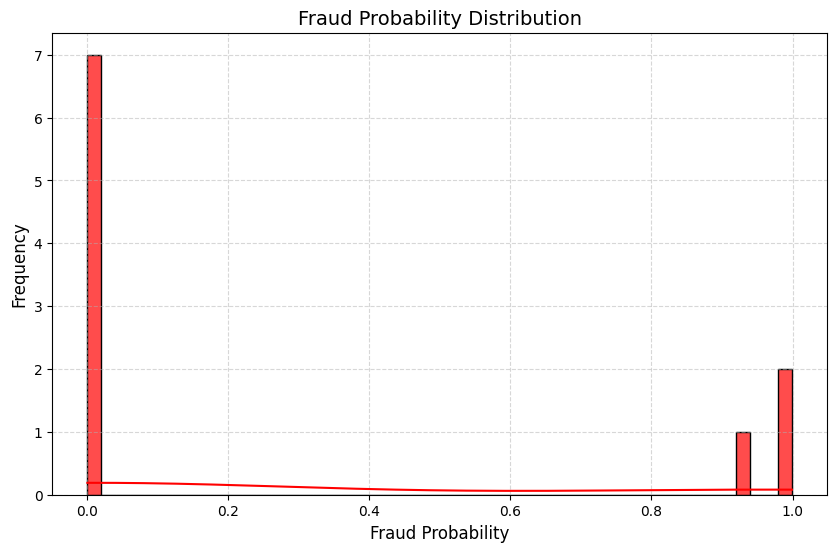

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fraud Probability Distribution Plot
plt.figure(figsize=(10,6))
sns.histplot(new_transactions["Fraud_Probability"], bins=50, kde=True, color="red", alpha=0.7)

plt.title("Fraud Probability Distribution", fontsize=14)
plt.xlabel("Fraud Probability", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [50]:
# Saving Fraud Probability Predictions
new_transactions.to_csv("fraud_predictions.csv", index=False)

print("Fraud predictions saved successfully!")


Fraud predictions saved successfully!


In [51]:
print("Model trained on features:", xgb_model.feature_names_in_)


Model trained on features: ['trans_date' 'unix_time' 'amt' 'merch_lat' 'merch_long'
 'customer_num_trans_1_day' 'customer_num_trans_7_day'
 'customer_num_trans_30_day' 'trans_time_is_night' 'trans_time_day'
 'trans_date_is_weekend' 'customer_avg_amount_1_day'
 'customer_avg_amount_7_day' 'customer_avg_amount_30_day'
 'merchant_num_trans_1_day' 'merchant_num_trans_7_day'
 'merchant_num_trans_30_day' 'merchant_risk_1_day' 'merchant_risk_7_day'
 'merchant_risk_30_day' 'merchant_risk_90_day' 'transaction_hour'
 'customer_avg_transaction_amount' 'merchant_fraud_rate'
 'merchant_high_risk_flag' 'hourly_fraud_rate' 'is_high_risk_hour']


In [52]:
# Copy data
X_test_fixed = X_test.copy()

# Converting trans_date from nanoseconds to seconds
X_test_fixed["trans_date"] = X_test_fixed["trans_date"] / 1e9

# Convert to proper datetime format
X_test_fixed["trans_date"] = pd.to_datetime(X_test_fixed["trans_date"], unit="s", errors="coerce").dt.strftime("%Y-%m-%d")

X_test_fixed["trans_time_day"] = X_test_fixed["trans_time_day"].round().astype(int)

X_test_fixed.head()


trans_date  unix_time       amt  merch_lat  merch_long  \
289399  2023-02-18   0.784394  0.008908   0.429127    0.753924   
374378  2023-03-07   0.833069  0.001046   0.399905    0.767608   
94865   2022-05-29   0.060329  0.004742   0.247966    0.685919   
1935    2022-10-09   0.423545  0.051789   0.540509    0.770479   
135389  2022-11-11   0.514311  0.000372   0.457946    0.937894   

        customer_num_trans_1_day  customer_num_trans_7_day  \
289399                  0.166667                  0.363636   
374378                  0.666667                  0.454545   
94865                   0.666667                  0.454545   
1935                    0.166667                  0.454545   
135389                  0.666667                  0.727273   

        customer_num_trans_30_day  trans_time_is_night  trans_time_day  ...  \
289399                     0.3125                  0.0               1  ...   
374378                     0.5625                  1.0               0  ...   
94865                      0.3125                  0.0               1  ...   
1935                       0.5000                  1.0               1  ...   
135389                     0.6875                  1.0               1  ...   

        merchant_risk_1_day  merchant_risk_7_day  merchant_risk_30_day  \
289399             0.428571             0.400000              0.478261   
374378             0.714286             0.733333              0.652174   
94865              0.714286             0.466667              0.565217   
1935               0.571429             0.333333              0.565217   
135389             0.571429             0.733333              1.000000   

        merchant_risk_90_day  transaction_hour  \
289399                  0.46          0.043478   
374378                  0.86          0.913043   
94865                   0.20          0.043478   
1935                    0.70          0.000000   
135389                  0.46          0.217391   

        customer_avg_transaction_amount  merchant_fraud_rate  \
289399                         0.008908             0.718187   
374378                         0.001046             0.030169   
94865                          0.004742             0.078224   
1935                           0.051789             0.092249   
135389                         0.000372             0.039987   

        merchant_high_risk_flag  hourly_fraud_rate  is_high_risk_hour  
289399                      0.0           0.596498                0.0  
374378                      0.0           0.575448                0.0  
94865                       0.0           0.586718                0.0  
1935                        0.0           0.598818                0.0  
135389                      0.0           0.009264                0.0  

[5 rows x 27 columns]